# SC1015 Mini Project
<ol>
  <li>Dang Huy Phuong (U2120380G)</li>
  <li>Clara Heng (U2122795J)</li>
</ol>


# Content
<ol>
  <li>Problem and Objective</li>
  <li>Clean and Data Exploratory Analysis</li>
  <li>Supervised Method</li>
  <li>Unsupervised Method</li>
  <li>Finding and Conclusion </li>
</ol>

# 1. Problem and Objective
Based on the Formula 1 World Championship (1950 - 2023) dataset from Kaggle https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020 we aim to build model to predict:
<ul>
  <li>Which driver will finish in the top position in the Driver’s Championship at the end of the season based on their past performance and characteristics using supervised learning methods</li>
  <li>If a driver have potential to become a top F1 driver based on their previous performance, team composition, and financial status
</li>
</ul>


# 2. Clean and Data Exploratory Analysis

In this section, we aim to check for missing/uncompleted values, remove columns that are insignificant in predicting and engineer new feature

In [240]:
import pandas as pd
import numpy as np

#visualization tools
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime
sns.set()

from os import listdir
from os.path import isfile, join

## 2.1 Construting Master Dataframe

In this subsection, we build a master dataframe from various csv file (i.e. drivers.csv, results.csv, circuits.csv)

In [241]:
mypath = '/kaggle/input/formula-1-world-championship-1950-2020'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for file in onlyfiles:
    print(file) #names of the all datasets

races.csv
constructor_results.csv
drivers.csv
constructors.csv
lap_times.csv
status.csv
driver_standings.csv
seasons.csv
pit_stops.csv
sprint_results.csv
constructor_standings.csv
results.csv
circuits.csv
qualifying.csv


### 2.1.1 Read Files

In [242]:
drivers = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv')
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [243]:
driver_result = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/results.csv')
driver_result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [244]:
races = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/races.csv')
races_date = races[['date', 'circuitId', 'raceId']]
races_date['date'] = pd.to_datetime(races_date['date'])

#Elimating Uncompleted data - Year 2023 and 2022
races_date = races_date[(races_date['date'].dt.year!=2023) & (races_date['date'].dt.year!=2022)]
races_date.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,circuitId,raceId
0,2009-03-29,1,1
1,2009-04-05,2,2
2,2009-04-19,17,3
3,2009-04-26,3,4
4,2009-05-10,4,5


In [245]:
circuits = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv')
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [246]:
driver_standings = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv')
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [247]:
laptimes = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv')
laptimes = laptimes[['raceId','driverId','lap','milliseconds']]
laptimes.head()

,raceId,driverId,lap,milliseconds
0,841,20,1,98109
1,841,20,2,93006
2,841,20,3,92713
3,841,20,4,92803
4,841,20,5,92342


In [248]:
qualifying = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv')
qualifying = qualifying[['driverId','position']]
qualifying.head()

,driverId,position
0,1,1
1,9,2
2,5,3
3,13,4
4,2,5


### 2.1.2 Merge Dataframes

In [249]:
df1 = pd.merge(driver_result, races, on ='raceId')
df_race= pd.merge(df1, drivers, on = 'driverId')
df_race

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,24,18,12,12,12,0.0,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25836,25798,1094,855,51,24,12,13,13,13,0.0,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25837,25817,1095,855,51,24,13,12,12,12,0.0,...,2022-11-12,19:30:00,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25838,25837,1096,855,51,24,15,12,12,12,0.0,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou


In [250]:
#Drop posterior data column (time, milliseconds, fastestLap, fastestLapTime, fastestLapSpeed, statusId)
posterior_data = ['laps', 'milliseconds', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'time_x', 'time_y', 'positionOrder']
df_race = df_race.drop(columns=posterior_data)
df_race

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,points,rank,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,10.0,2,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,4.0,3,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,0.0,19,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,6.0,3,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,8.0,2,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,24,18,12,12,0.0,15,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25836,25798,1094,855,51,24,12,13,13,0.0,7,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25837,25817,1095,855,51,24,13,12,12,0.0,17,...,2022-11-12,19:30:00,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25838,25837,1096,855,51,24,15,12,12,0.0,8,...,\N,\N,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou


In [251]:
#Drop redundant positon and positionText column
df_race = df_race.drop(columns=['position',  'positionText', 'number_x', 'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'nationality', 'url_x', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'quali_date', 'quali_time', 'fp3_date', 'fp3_time', 'name'])
df_race

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,18,0.0,15,2022,19,69,2022-10-23,ZHO,Guanyu,Zhou,1999-05-30
25836,25798,1094,855,51,12,0.0,7,2022,20,32,2022-10-30,ZHO,Guanyu,Zhou,1999-05-30
25837,25817,1095,855,51,13,0.0,17,2022,21,18,2022-11-13,ZHO,Guanyu,Zhou,1999-05-30
25838,25837,1096,855,51,15,0.0,8,2022,22,24,2022-11-20,ZHO,Guanyu,Zhou,1999-05-30


### 2.1.3 Feature Engineer

#### Age

In [252]:
#Change data type from string to datetime
df_race['dob'] = pd.to_datetime(df_race['dob'])
df_race['date'] = pd.to_datetime(df_race['date'])

In [253]:
#Add age column to dataframe
dates = datetime.today()-df_race['dob']
age = dates.dt.days/365
df_race['age'] = round(age)
df_race.head()

,resultId,raceId,driverId,constructorId,grid,points,rank,year,round,circuitId,date,code,forename,surname,dob,age
0,1,18,1,1,1,10.0,2,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07,38.0
1,27,19,1,1,9,4.0,3,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07,38.0
2,57,20,1,1,3,0.0,19,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07,38.0
3,69,21,1,1,5,6.0,3,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07,38.0
4,90,22,1,1,3,8.0,2,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07,38.0


#### winRate - Likelihood of winning a race

In [254]:
# INITIALISATION
df_driver = drivers.copy()
df_driver['totalWins'] = 0

race_dates = races[['raceId','date']]
# CLEANING AND ADDING

# adding dates to each race
driver_standings = driver_standings.merge(race_dates[['raceId', 'date']], how='left', on='raceId')

# Convert the "date" column to a datetime object
driver_standings['date'] = pd.to_datetime(driver_standings['date'])

# Create a new column 'year' to extract the year from the 'date' column
driver_standings['year'] = driver_standings['date'].dt.year
# driver_standings_csv.head()

# count the number of races each driver has driven in
num_races_per_driver = driver_standings.groupby('driverId')['raceId'].nunique()
num_races_per_driver_df = num_races_per_driver.reset_index()
num_races_per_driver_df = num_races_per_driver_df.rename(columns={'raceId': 'totalRaces'})
# num_races_per_driver_df.head()

# FINDING TOTAL WINS FOR EACH DRIVER
for index, row in df_driver.iterrows():
    driverId = row['driverId']

    # filtering out rows with ['driverId'] == driverId
    driver_standings_csv_driverId = driver_standings[driver_standings['driverId'] == driverId]

    # Group the dataframe by year and find the maximum date for each year
    latest_day_in_year = driver_standings_csv_driverId.groupby(driver_standings_csv_driverId['date'].dt.year)['date'].max()

    # Use the latest day in each year to filter the original dataframe
    filtered_dataframe = driver_standings_csv_driverId.loc[driver_standings_csv_driverId['date'].isin(latest_day_in_year)]

    total_wins = filtered_dataframe['wins'].sum()
    
    index = df_driver.index[df_driver['driverId'] == driverId].tolist()[0]
    df_driver.at[index, 'totalWins'] = total_wins


# adding dates to each race
df_driver = df_driver.merge(num_races_per_driver_df, how='left', on='driverId')

# calculate win rate and drop totalWins columns
df_driver['winRate'] = df_driver['totalWins'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalWins'], axis=1)
df_driver['dob'] = pd.to_datetime(df_driver['dob'])
df_driver['age'] = 2023 - df_driver['dob'].dt.year
    
# PRINT CURRENT DATASET    
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42


 ####  fastestLapRate - Likelihood of winning fastest lap

In [255]:
# Group the dataframe by raceId and find the index of the row with the minimum milliseconds
idx = laptimes.groupby('raceId')['milliseconds'].idxmin()

# Use the index to select the rows with the minimum milliseconds for each raceId
df_min_milliseconds = laptimes.loc[idx]

# Sort the result by raceId
df_min_milliseconds.sort_values('raceId', inplace=True)

counts = pd.DataFrame(df_min_milliseconds['driverId'].value_counts())
counts.columns = ['totalFastestLaps']
counts['driverId'] = counts.index
counts.reset_index(drop=True, inplace=True)

# adding totalFastestLaps to df maindata_wnames
df_driver = df_driver.merge(counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)

# calculate fastest lap rate and drop totalFastestLaps
df_driver['fastestLapRate'] = df_driver['totalFastestLaps'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalFastestLaps'], axis=1)

# PRINT CURRENT DATASET    
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.192926
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.010309
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.097087
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.063712
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.018018


 ####  qualifyingWinRate - Likelihood of winning qualifying

In [256]:
# COUNTING THE NUMBER OF QUALIFYING WINS
# Group by driverId and position, then count the number of occurrences
position_1_counts = qualifying[qualifying['position'] == 1].groupby('driverId')['position'].count().reset_index()

# Rename the 'position' column to 'position_1_count'
position_1_counts = position_1_counts.rename(columns={'position': 'position_1_count'})

# # Print the resulting DataFrame
# position_1_counts.head()

# merge
df_driver = df_driver.merge(position_1_counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)

# calculate fastest lap rate and drop totalFastestLaps
df_driver['qualifyingWinRate'] = df_driver['position_1_count'] / df_driver['totalRaces']
df_driver = df_driver.drop(['position_1_count'], axis=1)

# filling in NaN values for qualifyingWinRate
df_driver.fillna(0, inplace=True)

df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.192926,0.340836
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.010309,0.005155
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.097087,0.145631
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.063712,0.063712
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.018018,0.009009


## 2.2 Exploratory Data Analysis

In this subsection, we start to have first look in data and do some visualization to facilitate the analyzating process. It also help us to set up for machine learning model

In [83]:
#Number of data point
print("Number of data point for race dataframe: " + str(df_race.shape[0]))
print("Number of data point for driver dataframe: " + str(df_driver.shape[0]))

Number of data point for race dataframe: 25840
Number of data point for driver dataframe: 857


In [84]:
print("Data frame race information")
df_race.info()

print('\n\n')
print("Data frame driver information")
df_driver.info()

Data frame race information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25840 entries, 0 to 25839
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   resultId       25840 non-null  int64         
 1   raceId         25840 non-null  int64         
 2   driverId       25840 non-null  int64         
 3   constructorId  25840 non-null  int64         
 4   grid           25840 non-null  int64         
 5   points         25840 non-null  float64       
 6   rank           25840 non-null  object        
 7   year           25840 non-null  int64         
 8   round          25840 non-null  int64         
 9   circuitId      25840 non-null  int64         
 10  date           25840 non-null  datetime64[ns]
 11  code           25840 non-null  object        
 12  forename       25840 non-null  object        
 13  surname        25840 non-null  object        
 14  dob            25840 non-null  datetime64[

> There is no null value in dataframe

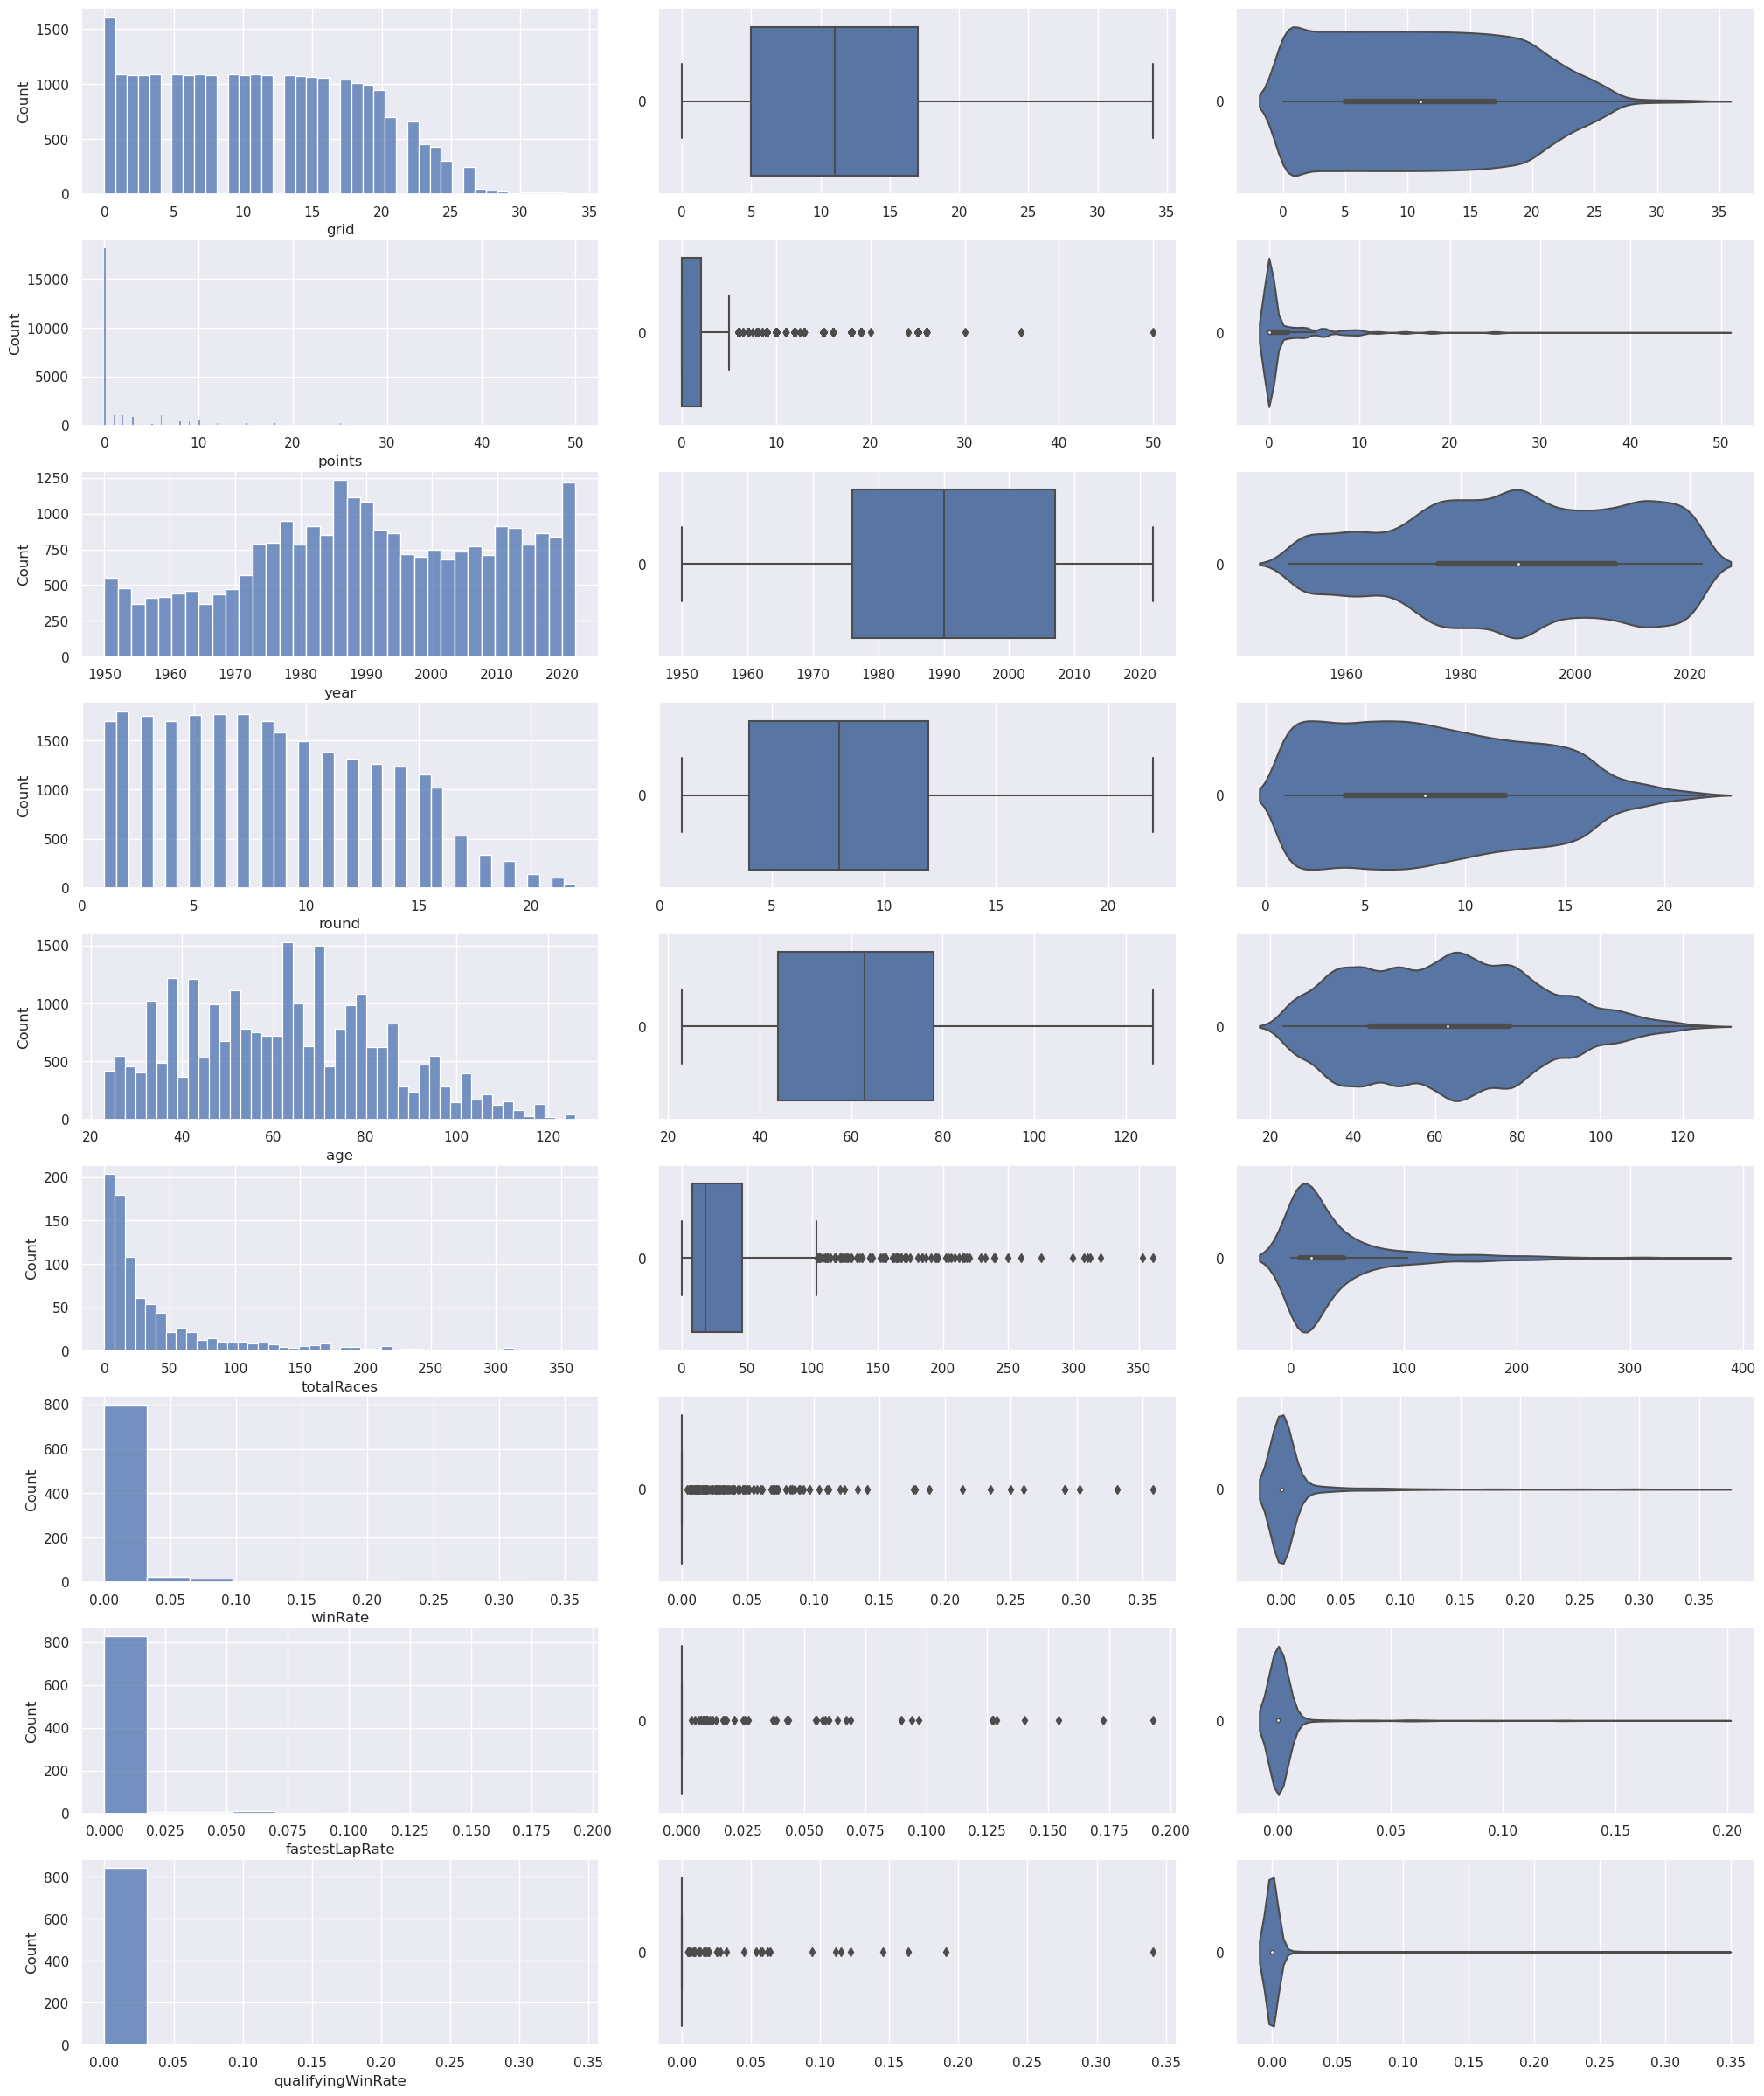

In [304]:
# plotting the distributions of the level variables
f, axes = plt.subplots(9, 3, figsize=(20, 24))

df_numeric = pd.DataFrame(df_race[['grid', 'points', 'year', 'round', 'age']])
# Format the layout so that no overlapping between titles and graphs
df_numeric_1 = pd.DataFrame(df_driver[['totalRaces', 'winRate', 'fastestLapRate', 'qualifyingWinRate']])
plt.tight_layout()
count = 0

for var in df_numeric:
    sns.histplot(data = df_numeric[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric[var], orient = "h", ax = axes[count,2])
    count += 1
    
for var in df_numeric_1:
    sns.histplot(data = df_numeric_1[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric_1[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric_1[var], orient = "h", ax = axes[count,2])
    count += 1

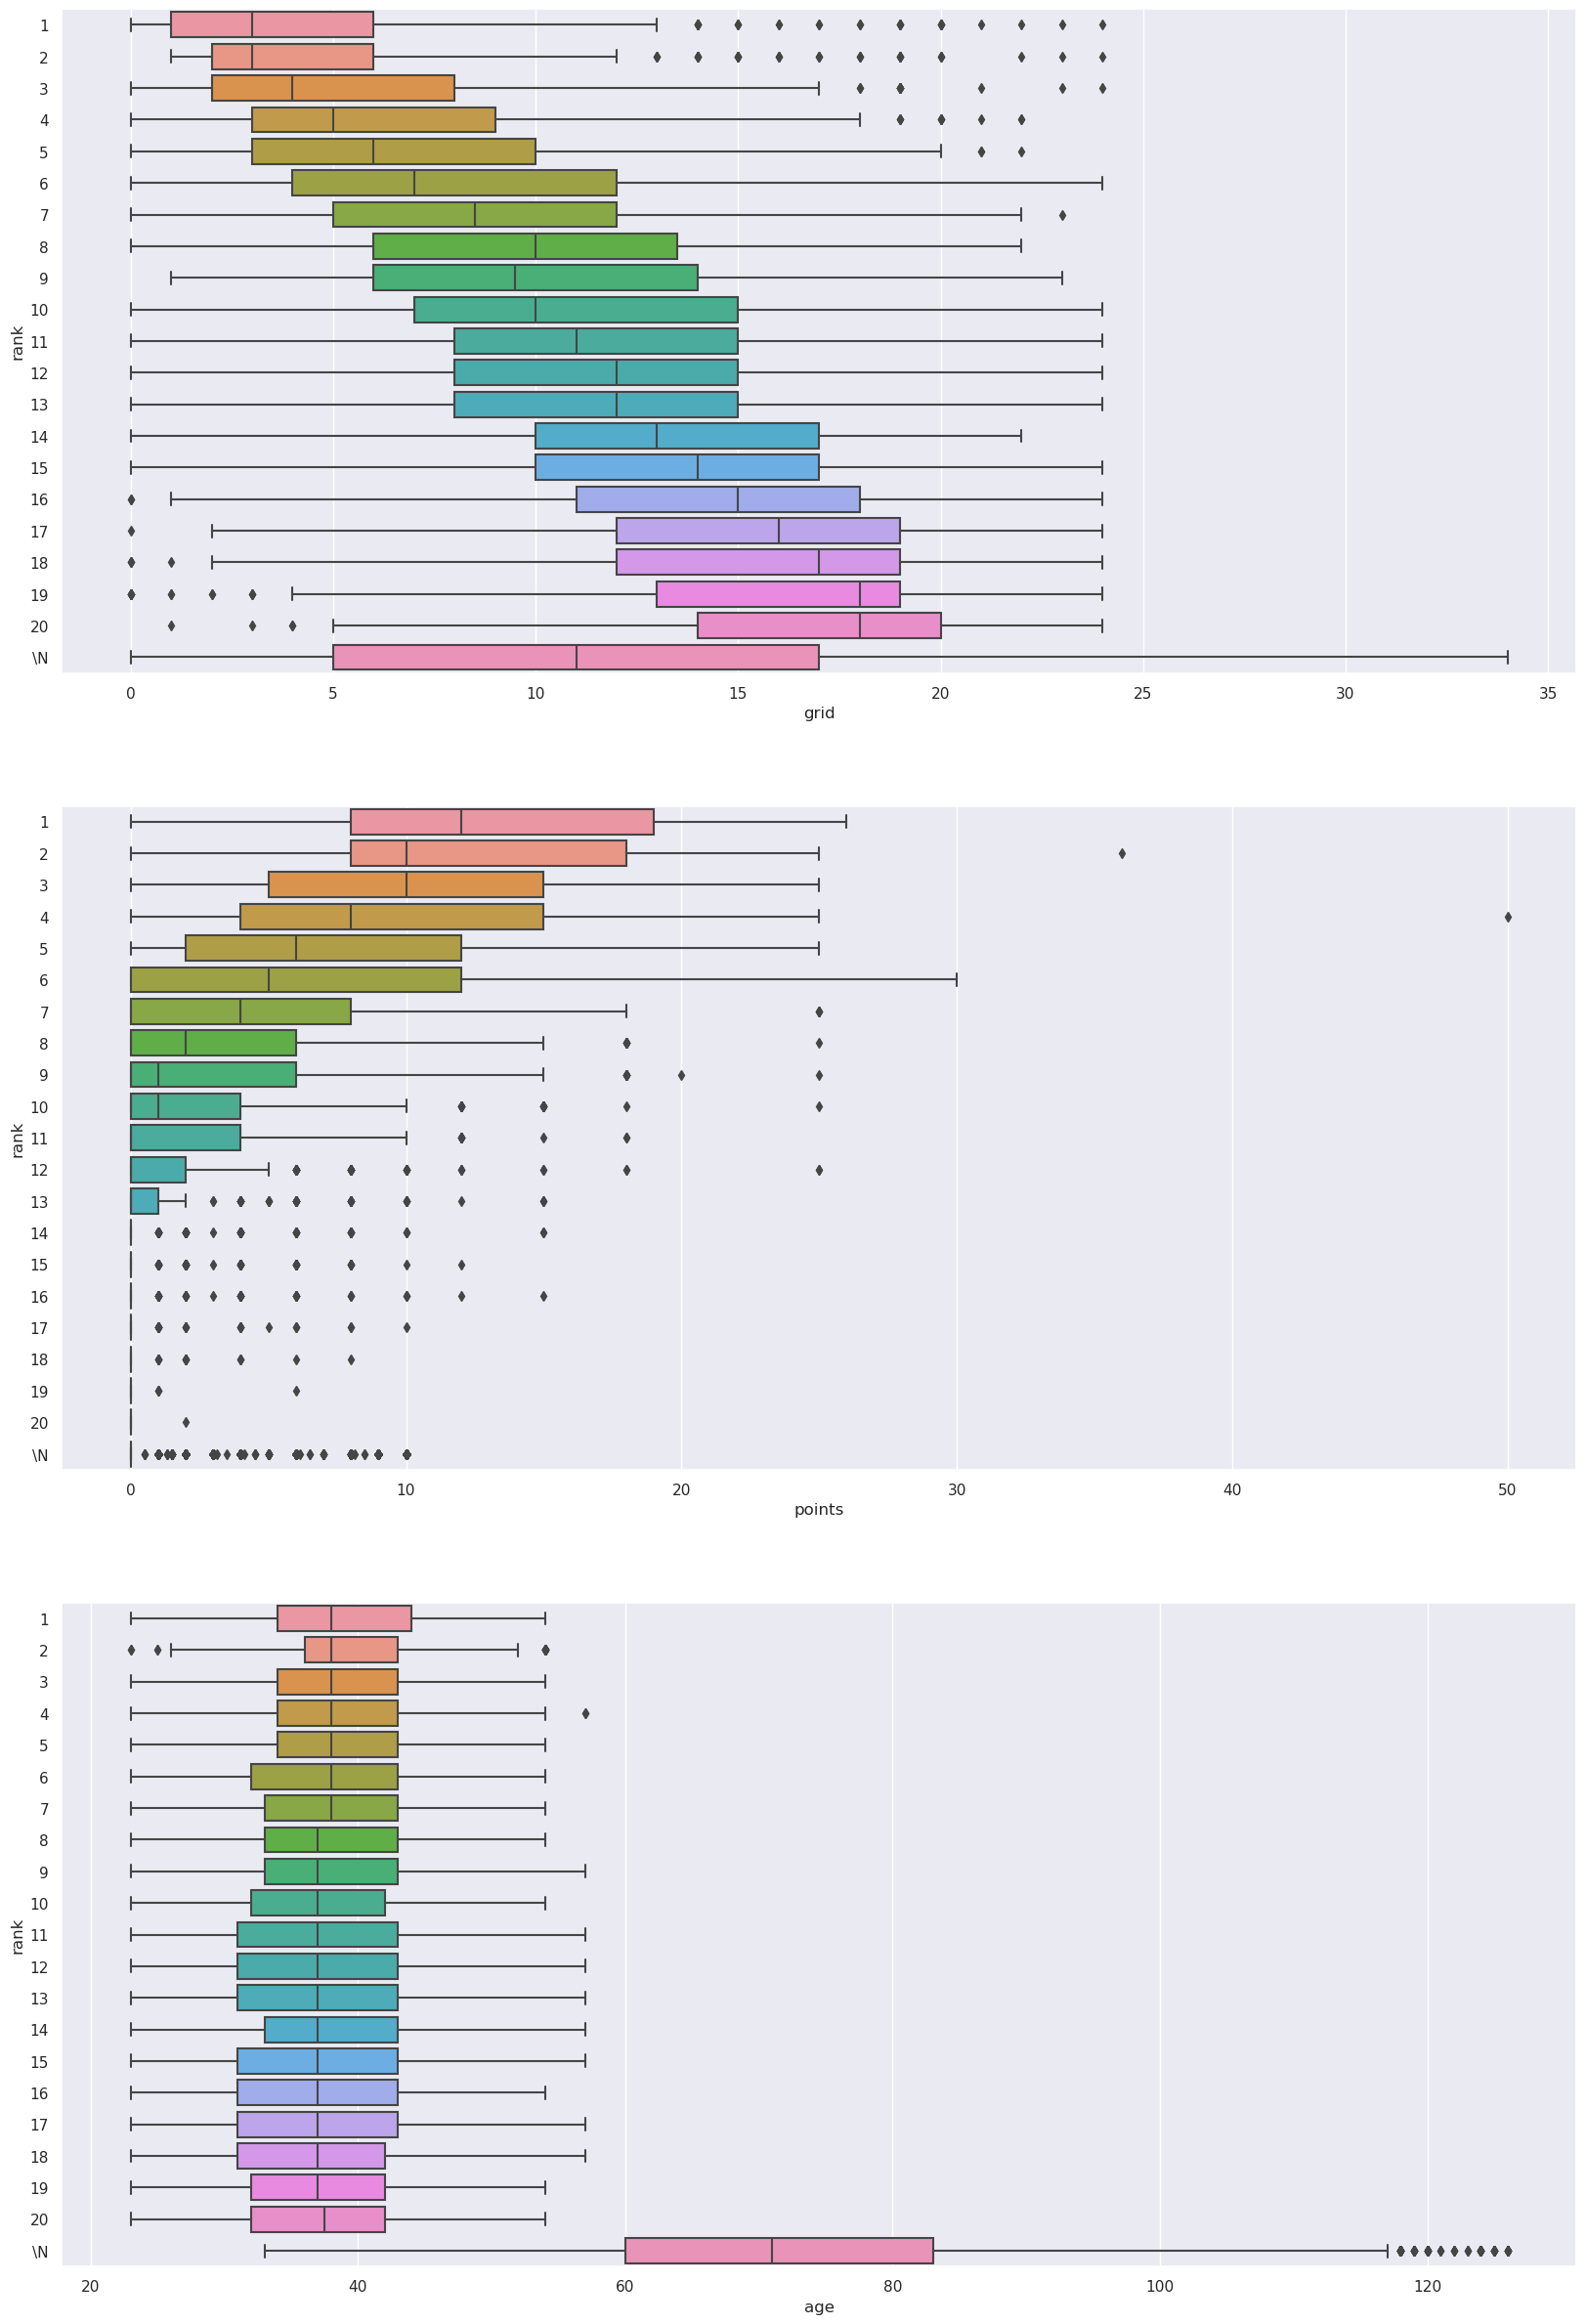

In [306]:
#Categorical Value
f, axes = plt.subplots(3, 1, figsize=(20, 30))
df_cat = pd.DataFrame(df_race[['grid', 'points', 'age', 'rank']])
count = 0
for col in df_cat:
    if col!='rank':
        sns.boxplot(data=df_race, x=col, y='rank', order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19', '20', '\\N'], ax=axes[count])
        count = count + 1

In [90]:
df_race.describe()

,resultId,raceId,driverId,constructorId,grid,points,year,round,circuitId,age
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,1.877053,1990.251780,8.385991,23.486920,62.595008
std,7460.682031,299.440908,268.623016,59.732131,7.243725,4.169849,19.345632,4.958210,18.569371,21.721847
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1950.000000,1.000000,1.000000,23.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,0.000000,1976.000000,4.000000,9.000000,44.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,0.000000,1990.000000,8.000000,18.000000,63.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,2.000000,2007.000000,12.000000,34.000000,78.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,50.000000,2022.000000,22.000000,79.000000,126.000000


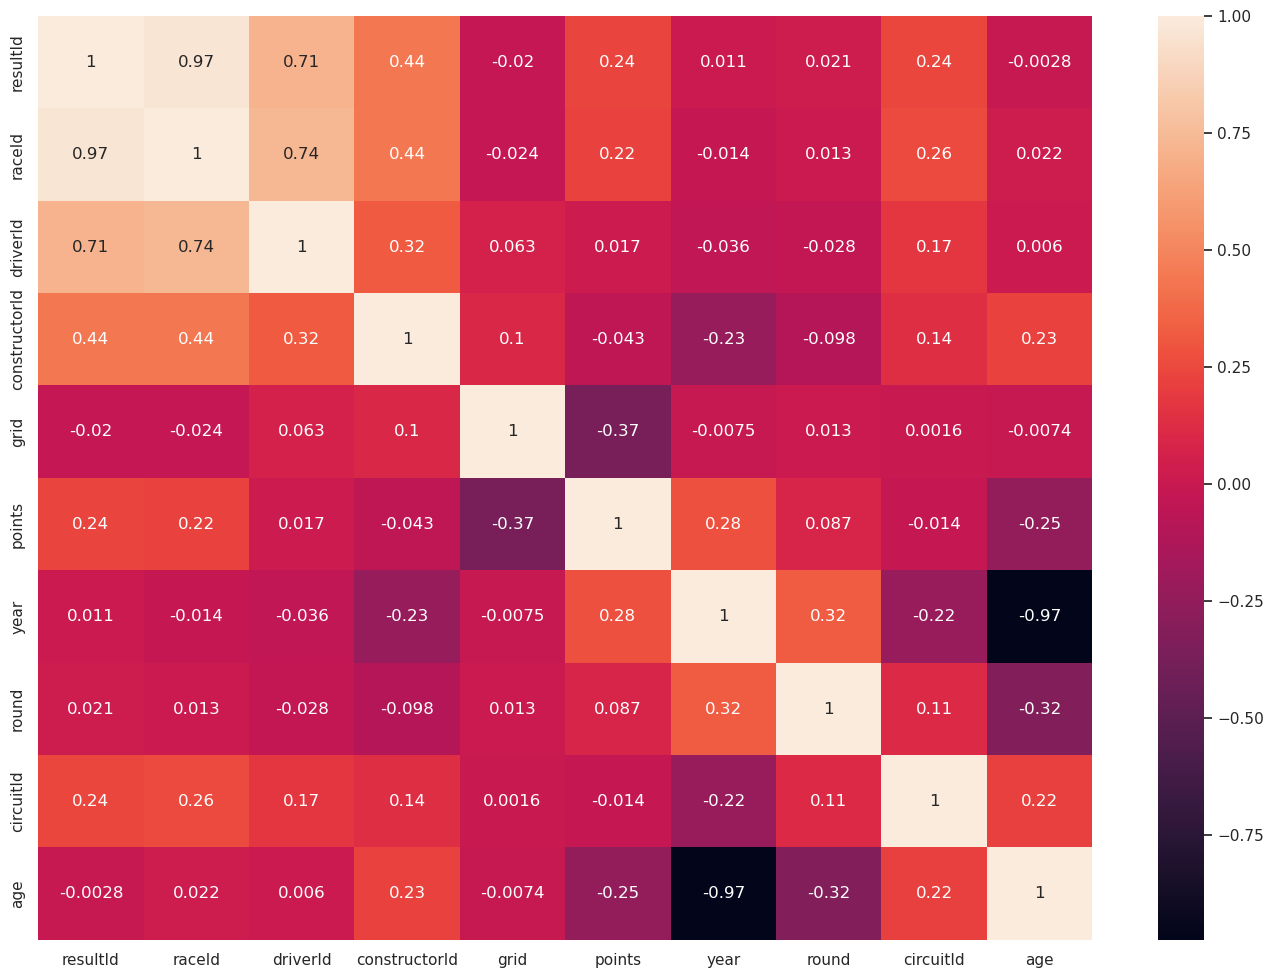

In [308]:
plt.figure(figsize=(17,12))
sns.heatmap(df_race.corr(),annot=True)

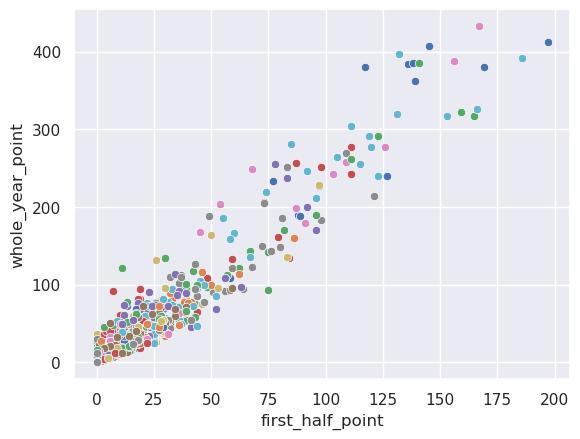

In [93]:
#Clasify race as the first half and second half by a new variable first_half
driver_result_withdate_divided = df_race.copy()
driver_result_withdate_divided['firstHalf'] = (driver_result_withdate_divided['date'].dt.month <= 6).astype(int)

driver_result_withdate_groupby_year_divided = driver_result_withdate_divided.groupby([driver_result_withdate_divided['date'].dt.year, driver_result_withdate_divided['firstHalf'], driver_result_withdate_divided['driverId']])
point_year_divided = driver_result_withdate_groupby_year_divided["points"].sum().unstack()

age_year = driver_result_withdate_groupby_year_divided["age"].mean().unstack()
age_year

#Loop through each team 
#Column name is ID of each team
point_first_half_all = []
whole_year_point_all = []
for column in point_year_divided:
    point_year_driver_divided = point_year_divided[column].unstack()
    point_first_half = []
    whole_year_point = []
    ages = []
    age_one_year = age_year[column].unstack()
    point_year_driver_divided = pd.merge(point_year_driver_divided, age_one_year, on='date')
    #Loop through each year
    for row in point_year_driver_divided.iterrows():
        if not np.isnan(row[1][0]) and not np.isnan(row[1][1]) and (not np.isnan(row[1][2]) or not np.isnan(row[1][3])):
            if not np.isnan(row[1][2]):
                age = row[1][2]
            else:
                age = row[1][3]
            ages.append(age)
            point_first_half.append(row[1][1])
            point_first_half_all.append((row[1][1], age))
            whole_year_point.append(row[1][0]+row[1][1])
            whole_year_point_all.append(row[1][0])
    new_df = pd.DataFrame({'first_half_point':point_first_half, 'ages': ages, 'whole_year_point':whole_year_point})
    sns.scatterplot(x='first_half_point', y='whole_year_point', data=new_df)

# 3. Supervised Method

In this step, we will use several predictive models to discover possible patterns in the dataset and make predictions based on them. From there, we would be a step closer in answering our first objective:
    <ul>
    <li>Which driver will finish in the top position in the Driver’s Championship at the end of the season based on their past performance and characteristics using supervised learning methods</li>
    </ul>
    
After doing EDA, we decide to use points as target variables to predict. From that, we can use points to decide which driver will finish in the top position. We seperate it into two tracks:
<ul> 
    <li>In first situation, we assume that we already known the first half of year performance of drivers. From that we predict overall season performance of drivers </li>
    <li>In second situation, we do not know about this season performance of drivers. From last year performance of drivers, we predict races performance of this year</li>  
</ul>
Note: Due to the raw and incomplete nature of the data, leading to significant instability, we have decided to predict the average of ten races for the upcoming year in the second scenario.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

## 3.1 First Track

### 3.1.1 Linear Regression

In [95]:
train_x, test_x, train_y, test_y = train_test_split(pd.DataFrame(point_first_half_all), pd.DataFrame(whole_year_point_all), train_size=0.8)

In [96]:
#Train model
linreg = LinearRegression()
linreg.fit(train_x, train_y)

LinearRegression()

In [97]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [4.63852813]
Coefficients of Regression 	: a =  [[ 1.24626783 -0.05182665]]



In [98]:
train_y_hat = linreg.predict(train_x)
test_y_hat = linreg.predict(test_x)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(train_x, train_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y_hat, train_y))
#print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(train_y_hat, train_y)))
#print()

# Check the Goodness of Fit and Prediction Accuracy (on Test Data)
print("Goodness of Fit of Model and Prediction Accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(test_x, test_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y_hat, test_y))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8259860546751819
Mean Squared Error (MSE) 	: 191.29200597375254
Goodness of Fit of Model and Prediction Accuracy 	Test Dataset
Explained Variance (R^2) 	: 0.7482624920594148
Mean Squared Error (MSE) 	: 247.06616089711144


From the result, the linear regression model we developed provides a good fit for our data. The model was able to explain a significant proportion of the variance in the dependent variable using the independent variable. The coefficients for the independent variable were statistically significant, indicating a strong relationship between the two variables.

> We want to further improve the correctness of prediction by trying polynomial regression

### 3.1.2 Polynomial Regression 

In [99]:
train_x, test_x, train_y, test_y = train_test_split(pd.DataFrame(point_first_half_all), pd.DataFrame(whole_year_point_all), train_size=0.8)

In [100]:
polynomial_features= PolynomialFeatures(degree=2)
train_x_poly = polynomial_features.fit_transform(train_x)
test_x_poly = polynomial_features.fit_transform(test_x)

In [101]:
#Train model
polreg = LinearRegression()
polreg.fit(train_x_poly, train_y)

LinearRegression()

In [102]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', polreg.intercept_)
print('Coefficients of Regression \t: a = ', polreg.coef_)
print()

Intercept of Regression 	: b =  [7.57165089]
Coefficients of Regression 	: a =  [[ 0.00000000e+00  1.70510449e+00 -1.64597848e-01 -1.93443965e-04
  -1.11332218e-02  1.18966901e-03]]



In [104]:
train_y_hat = polreg.predict(train_x_poly)
test_y_hat = polreg.predict(test_x_poly)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy score\t:", polreg.score(train_x_poly, train_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y_hat, train_y))
#print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(train_y_hat, train_y)))
#print()

# Check the Goodness of Fit and Prediction Accuracy (on Test Data)
print("Goodness of Fit of Model and Prediction Accuracy \tTest Dataset")
print("Accuracy score \t:", polreg.score(test_x_poly, test_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y_hat, test_y))

Goodness of Fit of Model 	Train Dataset
Accuracy score	: 0.8243783877256072
Mean Squared Error (MSE) 	: 191.81024978113655
Goodness of Fit of Model and Prediction Accuracy 	Test Dataset
Accuracy score 	: 0.8249136323346494
Mean Squared Error (MSE) 	: 176.60887051965435


> Compared to Linear Regression model, Polynomial Regression Model give a better fit on train set, but have a worse performance on validation set. From that observation, we can say that Polynomial Regression Model is overfitted. Linear Regression Model still give the best result

## 3.2 Second Track

In [105]:
driver_result_withdate_divided = driver_result_withdate_divided[driver_result_withdate_divided["points"]<=20]

In [106]:
driver_ids = driver_result_withdate_divided["driverId"].unique()

In [107]:
last_ten_race_results=[]
current_race_results=[]
for driver_id in driver_ids:
    temp_df = driver_result_withdate_divided[driver_result_withdate_divided["driverId"]==driver_id]
    temp_df = temp_df.sort_values('date')
    if(temp_df.shape[0]<=50):
        continue
    for i in range(51, temp_df.shape[0]):
        last_ten_race_results.append(temp_df.iloc[i-51:i-11]['points'].tolist()+temp_df.iloc[i-10:i]['age'].tolist()+temp_df.iloc[i-10:i]['round'].tolist()+temp_df.iloc[i-10:i]['grid'].tolist()+temp_df.iloc[i-10:i]['raceId'].tolist())
        current_race_results.append(temp_df.iloc[i-10:i]['points'].mean())

In [108]:
#Check x, y size
assert len(last_ten_race_results)==len(current_race_results)

In [109]:
train_x, test_x, train_y, test_y = train_test_split(last_ten_race_results, current_race_results, train_size=0.8)

In [110]:
#Train Model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(30, 20, 30,10,20,40), max_iter=300)
mlp_regressor.fit(train_x, train_y)

MLPRegressor(hidden_layer_sizes=(30, 20, 30, 10, 20, 40), max_iter=300)

In [111]:
train_y_hat = mlp_regressor.predict(train_x)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy score \t:", mlp_regressor.score(train_x, train_y))
print("Mean Squared Error (MSE):", mean_squared_error(train_y_hat, train_y))
print()

# Check the Goodness of Fit and Prediction Accuracy (on Test Data)
print("Goodness of Fit of Model and Prediction Accuracy \tTest Dataset")
print("Accuracy score\t:", mlp_regressor.score(test_x, test_y))

Goodness of Fit of Model 	Train Dataset
Accuracy score 	: 0.8736483508654899
Mean Squared Error (MSE): 1.2365559239869715

Goodness of Fit of Model and Prediction Accuracy 	Test Dataset
Accuracy score	: 0.8260296038186944


# Unsupervised method

### Kmeans Clustering

In [264]:
maindata = df_driver.drop(['totalRaces','driverId','driverRef'], axis = 1)

# weird: when the constructor boolean is included, the elbow graph is very weird.
# solution: consider all other variables first
maindata = maindata[['winRate','fastestLapRate','qualifyingWinRate','age']]

maindata.head()

,winRate,fastestLapRate,qualifyingWinRate,age
0,0.331190,0.192926,0.340836,38
1,0.000000,0.010309,0.005155,46
2,0.111650,0.097087,0.145631,38
3,0.088643,0.063712,0.063712,42
4,0.009009,0.018018,0.009009,42


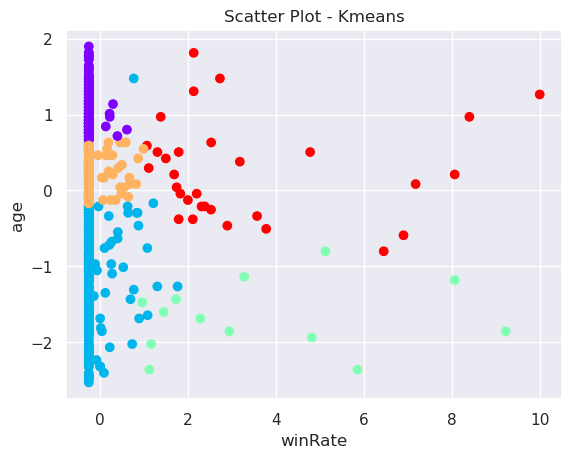

In [303]:
# PLOTTING SCATTERPLOT

# Normalising data
from sklearn.preprocessing import scale

# Apply z-score normalization to the dataset
maindata_normalized = pd.DataFrame(scale(maindata), columns=maindata.columns)

# maindata_normalized.head()

# Import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# edit the no. of desired clusters here
clusters = 5

# Choose the number of clusters you want to create:
kmeans = KMeans(n_clusters= clusters)

# Fit the model to your data:
kmeans.fit(maindata_normalized)

# Get the cluster labels for each data point:
labels = kmeans.predict(maindata_normalized)

# Visualize the clusters using a scatter plot:
# plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='rainbow')
plt.scatter(maindata_normalized['winRate'], maindata_normalized['age'], c=labels, cmap='rainbow')
plt.title('Scatter Plot - Kmeans')
plt.xlabel('winRate')
plt.ylabel('age')

plt.show()

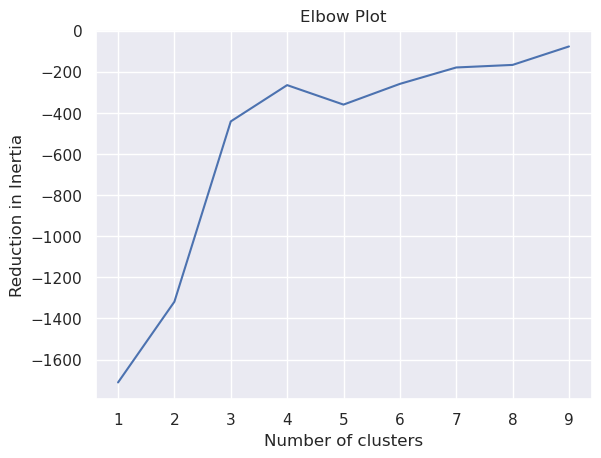

In [296]:
# FINDING THE BEST VALUE OF K (K = NUMBER OF GROUPS)

# Create a list to store inertias for different k values
inertias = []
inertia_reduction = []

# Loop over different k values and calculate the inertia for each
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(maindata_normalized)
    inertias.append(kmeans.inertia_)

print()
    
for i in range (1,10):
    diff = inertias[i] - inertias[i-1]
    inertia_reduction.append(diff)

# Visualize the elbow plot
plt.plot(range(1, 10), inertia_reduction)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in Inertia')
plt.show()


In [297]:
# Get the cluster labels for each driver
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
maindata['Kmeans_cluster'] = labels

# Analyze the clusters
cluster_counts = maindata['Kmeans_cluster'].value_counts()
print(cluster_counts)

# Get the average characteristics for each cluster
cluster_means = maindata.groupby('Kmeans_cluster').mean()

1    274
0    247
5    180
3     99
8     26
7     12
6      8
4      6
2      4
9      1
Name: Kmeans_cluster, dtype: int64


### DBSCAN

In [298]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [299]:
# Normalize your data
X = StandardScaler().fit_transform(maindata)

In [300]:
# Perform DBSCAN clustering
db = DBSCAN().fit(X)

# Get the labels (cluster assignment) and the number of clusters
dbscan_labels = db.labels_
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Print the number of clusters
print('Estimated number of clusters: %d' % n_clusters_)

# Print the silhouette score if desired
silhouette_score = metrics.silhouette_score(X, dbscan_labels)
print("Silhouette Coefficient: %0.3f" % silhouette_score)

# Add the cluster labels to your original dataset
maindata['DBSCAN_cluster'] = dbscan_labels

maindata

Estimated number of clusters: 5
Silhouette Coefficient: 0.707


,winRate,fastestLapRate,qualifyingWinRate,age,Kmeans_cluster,DBSCAN_cluster
0,0.331190,0.192926,0.340836,38,9,-1
1,0.000000,0.010309,0.005155,46,3,0
2,0.111650,0.097087,0.145631,38,2,-1
3,0.088643,0.063712,0.063712,42,6,-1
4,0.009009,0.018018,0.009009,42,3,-1
...,...,...,...,...,...,...
852,0.000000,0.000000,0.000000,24,3,0
853,0.000000,0.043478,0.000000,24,7,-1
854,0.000000,0.000000,0.000000,28,3,0
855,0.000000,0.000000,0.000000,22,3,0


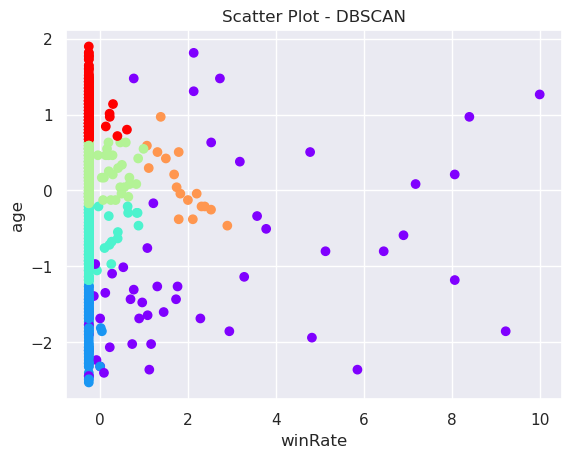

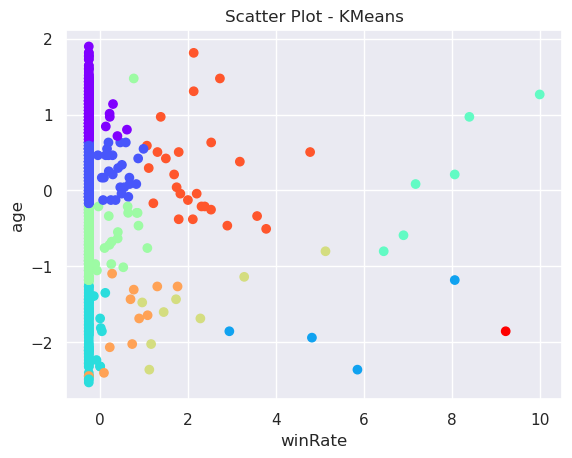

In [302]:
plt.scatter(maindata_normalized['winRate'], maindata_normalized['age'], c=dbscan_labels, cmap='rainbow')
plt.title('Scatter Plot - DBSCAN')
plt.xlabel('winRate')
plt.ylabel('age')

plt.show()

plt.scatter(maindata_normalized['winRate'], maindata_normalized['age'], c=labels, cmap='rainbow')
plt.title('Scatter Plot - KMeans')
plt.xlabel('winRate')
plt.ylabel('age')

plt.show()

# Finding and Conclusion